In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('qmsloan_data.xlsx', dtype={'first_name':str,'last_name':str,'middle_name':str,'address':str,'loan_purpose':str,'outstanding_loan_obligation':str,'salary_payment_due_date':str,'user_id':str,'bank_statement_ext':str,'guid':str,'created':str,'id_card_ext':str,'id_card':str,'geo_state':str,'geo_city':str,'geo_formatted_address':str,'geo_status':str,'overdue_flag':str,'change_status':str,'channel':str})
df.head()



,id,loan_purpose,outstanding_loan_obligation,salary_payment_due_date,loan_tenure,loan_amount,outstanding_obligation_loan_amount,net_income,user_id,bank_statement_ext,...,declined_date,staff_guid,by_date,to_date,criteria_one_loan_status,requested_approval_by,requested_approval_date,bank_statement_password,channel,Unnamed: 74
0,199,Personal,Yes,2018-10-30 00:00:00,30,10000,14200,70000,Kay2sure,pdf,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,web,NaN
1,200,Personal,No,2018-10-31 00:00:00,25,10000,NaN,73748,Gman,pdf,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,web,NaN
2,201,Personal,No,2018-10-31 00:00:00,30,10000,NaN,7777777,MERCY@QCLTD,docx,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,web,NaN
3,202,Personal,No,2000-02-01 00:00:00,20,10000,NaN,30000,samson,pdf,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,web,NaN
4,203,Personal,No,2018-10-31 00:00:00,30,10000,NaN,20000,gyakson,docx,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,web,NaN


In [2]:
df.columns

Index(['id', 'loan_purpose', 'outstanding_loan_obligation',
       'salary_payment_due_date', 'loan_tenure', 'loan_amount',
       'outstanding_obligation_loan_amount', 'net_income', 'user_id',
       'bank_statement_ext', 'pay_slip_ext', 'submitted_date', 'guid',
       'created', 'created_at', 'created_by', 'updated', 'updated_at',
       'updated_by', 'identification_code', 'first_name', 'last_name',
       'loan_status', 'payslip', 'bank_statement', 'synch_date', 'middle_name',
       'loan_code', 'approved_amount', 'disbursed_date', 'loan_overdue_days',
       'client_code', 'penalty', 'total_payable', 'client_type',
       'payment_status', 'amount_paid', 'previous_amount_payable',
       'approved_amount_store', 'payable_balance', 'repayment_due_date',
       'latitude', 'longitude', 'interest', 'id_card_ext', 'id_card',
       'actual_repayment_due_date', 'rejection_reason',
       'payment_repayment_due_date', 'address', 'geo_state', 'geo_city',
       'geo_formatted_address',

In [3]:
df.describe()

,synch_date,approved_amount,loan_overdue_days,penalty,total_payable,amount_paid,previous_amount_payable,approved_amount_store,payable_balance,latitude,longitude,interest,disbursed_mail_flag,bank_code,by_date,to_date,criteria_one_loan_status
count,0.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,0.0,0.0,15000.000000,15000.000000,15000.000000,14859.000000,18.0,0.0,0.0,0.0
mean,NaN,2644.198200,3.858667,1003.018776,25348.338248,3235.130435,27604.648712,NaN,NaN,7.435608,6.158589,5859.917179,0.089508,0.0,NaN,NaN,NaN
std,NaN,6491.700908,20.507652,6988.408132,22904.123567,8709.427328,20524.625466,NaN,NaN,3.475962,9.715034,4761.778036,0.285485,0.0,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,-3347.170000,0.000000,0.000000,NaN,NaN,-104.847026,-171.248320,0.000000,0.000000,0.0,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,10500.000000,0.000000,12741.380000,NaN,NaN,6.469776,3.366827,2400.000000,0.000000,0.0,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,17280.000000,0.000000,19500.000000,NaN,NaN,6.650060,3.909882,3724.140000,0.000000,0.0,NaN,NaN,NaN
75%,NaN,0.000000,0.000000,0.000000,39000.000000,0.000000,39000.000000,NaN,NaN,8.951967,7.453609,9000.000000,0.000000,0.0,NaN,NaN,NaN
max,NaN,50000.000000,343.000000,287875.000000,301620.000000,120215.000000,65000.000000,NaN,NaN,120.272472,138.164062,15000.000000,1.000000,0.0,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                               117
loan_purpose                     171
outstanding_loan_obligation      148
salary_payment_due_date          222
loan_tenure                      122
                               ...  
requested_approval_by          12721
requested_approval_date        12721
bank_statement_password        14943
channel                          682
Unnamed: 74                    15195
Length: 75, dtype: int64

In [5]:
#df = df.dropna(axis=1,how='all')
#remove rows and columns where greater than half of the values are null
df.shape
df.dropna(thresh=len(df.index)/2, axis=1, inplace=True)
df.shape
# remove all rows where id is null
df = df[pd.notnull(df['id'])]
df = df[pd.notnull(df['loan_status'])]
# Will drop all rows that have any missing values.
df.dropna(inplace=True)
df.isnull().sum().max()
#col_names =  ['amount_paid', 'approved_amount', 'disbursed_mail_flag','interest','interest','latitude','loan_overdue_days','longitude'
             #,'penalty','previous_amount_payable','total_payable','loan_tenure','loan_amount','net_income','loan_status']

#df.drop(df.columns.difference(col_names), 1, inplace=True)
print(len(df.columns.values))

44


In [6]:
df.describe()

,approved_amount,loan_overdue_days,penalty,total_payable,amount_paid,previous_amount_payable,latitude,longitude,interest,disbursed_mail_flag
count,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000
mean,2369.235960,4.888271,1068.400335,26160.535932,2958.093888,28062.381119,7.847495,6.657088,5950.339047,0.118476
std,5908.370156,23.782076,6430.273482,23172.728582,8060.070022,21094.565230,2.979708,8.810490,4868.730888,0.323203
min,0.000000,0.000000,0.000000,-3347.170000,0.000000,0.000000,0.000100,-102.454270,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7974.415000,0.000000,12310.340000,6.531968,3.379206,2137.930000,0.000000
50%,0.000000,0.000000,0.000000,19370.690000,0.000000,19500.000000,7.137372,5.220661,3853.450000,0.000000
75%,0.000000,0.000000,0.000000,40974.140000,0.000000,40672.410000,9.077800,9.077800,9000.000000,0.000000
max,50000.000000,268.000000,124800.000000,149250.000000,91000.000000,65000.000000,65.400033,77.000000,15000.000000,1.000000


In [7]:
#print distribution
print('Completed', round(df['loan_status'].value_counts()['Completed']/len(df) * 100,2), '% of the dataset')
print('Declined', round(df['loan_status'].value_counts()['Declined']/len(df) * 100,2), '% of the dataset')
print('In Overdue', round(df['loan_status'].value_counts()['In Overdue']/len(df) * 100,2), '% of the dataset')
print('Cancelled', round(df['loan_status'].value_counts()['Cancelled']/len(df) * 100,2), '% of the dataset')


Completed 19.51 % of the dataset
Declined 43.08 % of the dataset
In Overdue 3.23 % of the dataset
Cancelled 33.86 % of the dataset


In [8]:
df.loc[df['loan_status'] == 'In Overdue']

,id,loan_purpose,outstanding_loan_obligation,salary_payment_due_date,loan_tenure,loan_amount,net_income,user_id,bank_statement_ext,submitted_date,...,id_card,address,geo_state,geo_city,geo_formatted_address,geo_status,overdue_flag,change_status,disbursed_mail_flag,channel
992,31838,Emergency,No,30,30,20000,65000,Ilori 1,pdf,2019-01-27 10:23:28am,...,Ilori 12019.01.27_12.25.10pm.jpeg,52 sebiotimo street mangoro agege Lagos,Lagos,Dopemu,"60 Surulere Rd, Dopemu, Lagos, Nigeria",DONE,NO,0,0.0,web
1505,51770,Emergency,No,30,30,50000,100000,rnet2019,pdf,2019-02-20 04:48:17pm,...,rnet20192019.02.20_05.50.04pm.jpeg,3 IMAN MOSHOOD STREET AJAH LAGOS,Eti Osa,Lagos,"Lekki - Epe Expy, Aja, Lagos, Nigeria",DONE,NO,0,1.0,web
1630,54934,Emergency,No,24,30,50000,201000,mfatarbo,pdf,2019-02-27 09:11:00am,...,mfatarbo2019.02.27_10.15.05am.jpeg,6 Jaivbo Street Unity Estate Ajah Lagos,Lagos,Victoria Island,"Muri Okunola st. Opposite NEPA office., 291B J...",DONE,NO,0,1.0,web
2010,71071,Personal,No,28,30,40000,90000,Mudisure,pdf,2019-03-17 05:33:17pm,...,Mudisure2019.03.17_06.35.12pm.jpeg,"No 78 Alhaja abass street, Ogudu.",Lagos,Ogudu,"74 Alh. Abass St, Ogudu 100242, Lagos, Nigeria",DONE,NO,0,1.0,web
2037,72432,Personal,No,19th,30,10000,60000,Princekunle19@yahoo.com,pdf,2019-03-18 03:32:04pm,...,Princekunle19@yahoo.com2019.03.18_04.35.07pm.jpeg,12 nasiru atuwon street Benson ikorodu lagos,Lagos,Surulere,"23 Ibezim Obiajulu St, Surulere, Lagos, Nigeria",DONE,NO,0,1.0,web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13960,213689,School Fees,No,27,30,50000,0,Mumin,pdf,2019-09-16 11:05:13,...,Mumin2019.09.16_11.21.04am.jpg,Zone2 otun abeese oluyole extenaion ibadan,Nigeria,Plateau,"Mushere West, Nigeria",DONE,NO,0,0.0,mobile
14090,214142,Personal,No,31,30,35000,0,calibremorris,pdf,2019-09-16 21:44:33,...,calibremorris2019.09.16_10.01.13pm.jpg,15 ISUNBA compound Ilogbo EREMI badagry,Nigeria,Plateau,"Mushere West, Nigeria",DONE,NO,0,0.0,mobile
14558,225980,School Fees,No,31,30,25000,0,Slicksgear57,pdf,2019-09-18 18:36:37,...,Slicksgear572019.09.18_06.40.58pm.JPG,"42 Alimu Bakare Avenue, off Housing Road, Ado ...",Nigeria,Plateau,"Mushere West, Nigeria",DONE,NO,0,0.0,mobile
14731,226921,Emergency,No,30,30,20000,0,abbasgawu,pdf,2019-09-19 15:54:19,...,abbasgawu2019.09.19_04.01.29pm.jpg,No 294 Kaura street Kaura area Gawu Babangida,Nigeria,Plateau,"Mushere West, Nigeria",DONE,NO,0,0.0,mobile


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192964D5DC8>,
      dtype=object)

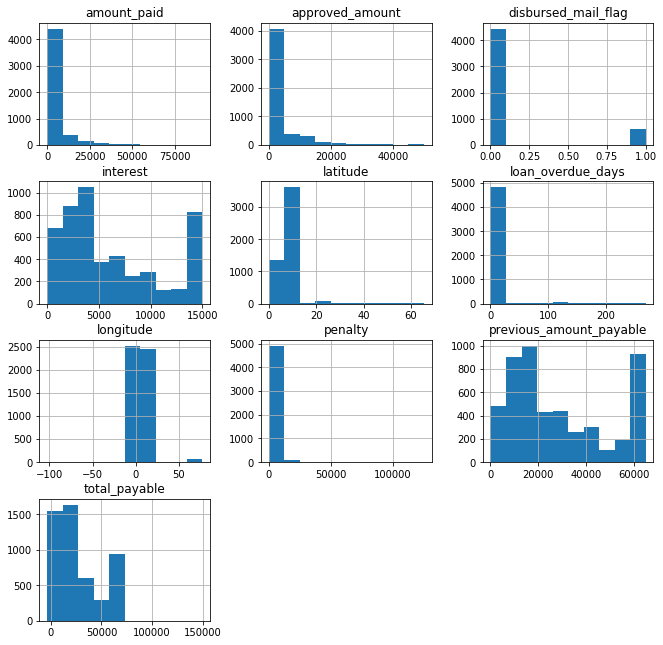

In [9]:
import matplotlib.pyplot as plt
df[df.dtypes[(df.dtypes=="float")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [10]:
# we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

# RobustScaler is less prone to outliers.

scaler = MinMaxScaler()



df['amount_paid'] = scaler.fit_transform(df['amount_paid'].values.reshape(-1,1))
df['approved_amount'] = scaler.fit_transform(df['approved_amount'].values.reshape(-1,1))
df['disbursed_mail_flag'] = scaler.fit_transform(df['disbursed_mail_flag'].values.reshape(-1,1))
df['interest'] = scaler.fit_transform(df['interest'].values.reshape(-1,1))
df['latitude'] = scaler.fit_transform(df['latitude'].values.reshape(-1,1))
df['loan_overdue_days'] = scaler.fit_transform(df['loan_overdue_days'].values.reshape(-1,1))


df['longitude'] = scaler.fit_transform(df['longitude'].values.reshape(-1,1))
df['penalty'] = scaler.fit_transform(df['penalty'].values.reshape(-1,1))
df['previous_amount_payable'] = scaler.fit_transform(df['previous_amount_payable'].values.reshape(-1,1))
df['total_payable'] = scaler.fit_transform(df['total_payable'].values.reshape(-1,1))

df['loan_tenure'] = scaler.fit_transform(df['loan_tenure'].values.reshape(-1,1))
df['loan_amount'] = scaler.fit_transform(df['loan_amount'].values.reshape(-1,1))
#df['outstanding_obligation_loan_amount'] = scaler.fit_transform(df['outstanding_obligation_loan_amount'].values.reshape(-1,1))
df['net_income'] = scaler.fit_transform(df['net_income'].values.reshape(-1,1))


df.describe()

,loan_tenure,loan_amount,net_income,approved_amount,loan_overdue_days,penalty,total_payable,amount_paid,previous_amount_payable,latitude,longitude,interest,disbursed_mail_flag
count,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000
mean,0.845926,0.525724,0.007985,0.047385,0.018240,0.008561,0.193370,0.032507,0.431729,0.119991,0.608018,0.396689,0.118476
std,0.260799,0.334286,0.031803,0.118167,0.088739,0.051525,0.151856,0.088572,0.324532,0.045561,0.049096,0.324582,0.323203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.689655,0.183673,0.000000,0.000000,0.000000,0.000000,0.074193,0.000000,0.189390,0.099876,0.589752,0.142529,0.000000
50%,1.000000,0.387755,0.003056,0.000000,0.000000,0.000000,0.148875,0.000000,0.300000,0.109133,0.600013,0.256897,0.000000
75%,1.000000,1.000000,0.005944,0.000000,0.000000,0.000000,0.290446,0.000000,0.625729,0.138803,0.621507,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
col_names =  ['amount_paid', 'approved_amount', 'disbursed_mail_flag','interest','interest','latitude','loan_overdue_days','longitude'
             ,'penalty','previous_amount_payable','total_payable','loan_tenure','loan_amount','net_income']
need_extra_parsing = ['address', 'bank_statement', 'bank_statement_ext', 'change_status',
       'channel', 'client_code', 'client_type', 'created', 'created_by',
       'first_name', 'geo_city', 'geo_formatted_address', 'geo_state',
       'geo_status', 'guid', 'id', 'id_card', 'id_card_ext',
       'identification_code', 'last_name', 'loan_code', 'loan_purpose',
       'loan_status', 'middle_name', 'outstanding_loan_obligation',
       'overdue_flag', 'payment_status', 'salary_payment_due_date',
       'submitted_date', 'updated', 'user_id']
df_scaled = df.drop(need_extra_parsing, 1, inplace=False)
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df_scaled = pd.DataFrame(imp.fit_transform(df_scaled), columns = df_scaled.columns) #only apply imputer to numeric columns


df_not_scaled = df.drop(col_names, 1, inplace=False)
df_not_scaled.head()


,id,loan_purpose,outstanding_loan_obligation,salary_payment_due_date,user_id,bank_statement_ext,submitted_date,guid,created,created_by,...,id_card_ext,id_card,address,geo_state,geo_city,geo_formatted_address,geo_status,overdue_flag,change_status,channel
243,2142,Emergency,No,26,Iceman4eva99,jpeg,2018-12-07 09:19:47am,82a6b42e365b0f74069ae74d9973b9f9,2018-12-07 10:55:03,ff5ea9a87306ef88f842b507da43e071,...,jpeg,Iceman4eva992018.12.07_10.55.03am.jpeg,No 8 adetoro graceland,Lagos,Lambasa,"29 Folarin St, Lambasa, Lagos, Nigeria",DONE,NO,0,web
244,2143,Personal,No,5,jguy007,pdf,2018-12-07 09:04:05am,06d6109d8200f24db92b545d9eab6320,2018-12-07 10:55:06,ff5ea9a87306ef88f842b507da43e071,...,jpeg,jguy0072018.12.07_10.55.06am.jpeg,"11 peace avenue, olaoluwa cda, lafenwa, ota",Ikeja,Allen,"7 Shomoye Tejuosho Cl, Allen, Ikeja, Nigeria",DONE,NO,0,web
247,2157,Emergency,No,30th,Cartoon,pdf,2018-12-07 11:18:20am,1fce37dce32ea421c48a80bcfc7b3e9f,2018-12-07 12:20:05,ff5ea9a87306ef88f842b507da43e071,...,jpeg,Cartoon2018.12.07_12.20.05pm.jpeg,1 oyebode street alagbado Moshalashi bus stop,Ifako/Ijaye,Lagos,"Micheal Whemu Cres, Ifako-Ijaiye, Lagos, Nigeria",DONE,NO,0,web
249,2163,Personal,No,27,joeomoware8,pdf,2018-12-07 12:13:06pm,b15be7738e68e584469020a22e5286b3,2018-12-07 15:08:29,4a919ff9c5aac606954247ce96682e33,...,pdf,joeomoware82018.12.07_03.08.29pm.pdf,"9b, Ladipo Street, Mushin",Lagos,Ikoyi,"77 Awolowo Rd, Ikoyi, Lagos, Nigeria",DONE,NO,0,web
251,2169,Personal,No,28,Tomilola,pdf,2018-12-07 01:52:31pm,679b454dab2a0f93a359e0c84a43773c,2018-12-07 15:55:05,4a919ff9c5aac606954247ce96682e33,...,pdf,Tomilola2018.12.07_03.55.05pm.pdf,"60, Orisumbare Street Abule-Oki Iyanapaja Lagos",Lagos,Alimosho,"78 Ipaja Rd, Alimosho, Lagos, Nigeria",DONE,NO,0,web


In [12]:
col_names =  [#'loan_purpose',
#'outstanding_loan_obligation',
#'salary_payment_due_date',
'user_id',
'bank_statement_ext',
'submitted_date',
'guid',
'created',
#'created_by',
#'identification_code',
'first_name',
'last_name',
#'loan_status',
#'bank_statement',
#'middle_name',
#'loan_code',
#'client_code',
#'client_type',
#'payment_status',
'id_card_ext',
'id_card',
'address',
#'geo_state',
#'geo_city',
'geo_formatted_address',
#'geo_status',
#'overdue_flag',
#'change_status'
#'channel'
]
numeric_col_names =  ['amount_paid', 'approved_amount', 'disbursed_mail_flag','interest','interest','latitude','loan_overdue_days','longitude'
             ,'penalty','previous_amount_payable','total_payable','loan_tenure','loan_amount','net_income']
other_numeric_cols= ['updated']
numeric_col_names += col_names
numeric_col_names += other_numeric_cols

df_not_scaled_removed_numeric = df.drop(numeric_col_names, 1, inplace=False)

#df_not_scaled_removed_numeric = df.drop(col_names, 1, inplace=False)


#you could do something like one-hot-encoding of data_categorical here

#join the two masked dataframes back together
df_not_scaled = df_not_scaled_removed_numeric
df_not_scaled.head()

,id,loan_purpose,outstanding_loan_obligation,salary_payment_due_date,created_by,identification_code,loan_status,bank_statement,middle_name,loan_code,client_code,client_type,payment_status,geo_state,geo_city,geo_status,overdue_flag,change_status,channel
243,2142,Emergency,No,26,ff5ea9a87306ef88f842b507da43e071,5c0a3b3378c7e5c0a3b3378c7f20181207,Declined,Iceman4eva992018.12.07_10.55.03am.jpeg,Waziri,LO-181207-2142,CU-181126-322,New Client,Pending,Lagos,Lambasa,DONE,NO,0,web
244,2143,Personal,No,5,ff5ea9a87306ef88f842b507da43e071,5c0a37854954d5c0a37854954e20181207,Declined,jguy0072018.12.07_10.55.06am.pdf,aduak,LO-181207-2143,CU-181207-1162,New Client,Pending,Ikeja,Allen,DONE,NO,0,web
247,2157,Emergency,No,30th,ff5ea9a87306ef88f842b507da43e071,5c0a56f94c6465c0a56f94c64720181207,Completed,Cartoon2018.12.07_12.20.05pm.pdf,Samuel,LO-181207-2153,CU-181117-156,New Client,Completed,Ifako/Ijaye,Lagos,DONE,NO,0,web
249,2163,Personal,No,27,4a919ff9c5aac606954247ce96682e33,5c0a63d2092605c0a63d20926120181207,Declined,joeomoware82018.12.07_03.08.29pm.pdf,Omoware,LO-181207-2163,CU-181126-485,New Client,Pending,Lagos,Ikoyi,DONE,NO,0,web
251,2169,Personal,No,28,4a919ff9c5aac606954247ce96682e33,5c0a7b1f537165c0a7b1f5371820181207,Declined,Tomilola2018.12.07_03.55.05pm.pdf,Felicia,LO-181207-2165,CU-181207-1176,New Client,Pending,Lagos,Alimosho,DONE,NO,0,web


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

oe =OneHotEncoder()

#oe.fit_transform(df_not_scaled)

le=LabelEncoder()
i=0

for c in df_not_scaled.columns.values:
    i=i+1
    #print(i)
    # Encoding only categorical variables
    if df_not_scaled[c].map(type).eq(str).any():
        df_not_scaled[c].astype(str)
        try:
            
            if c =='loan_status':
                continue
            print(c)
            le.fit(df_not_scaled[c])
            df_not_scaled[c]=le.transform(df_not_scaled[c])
        except Exception as e:
            print(e)
            df_not_scaled[c]=df_not_scaled[c]
            #print(df_not_scaled[c])
       
df_scaled.reset_index(drop=True, inplace=True)
df_not_scaled.reset_index(drop=True, inplace=True)
#df = df_scaled.join(df_not_scaled)
#df_scaled.head()
#df_not_scaled.to_numeric(x, errors='coerce')
df = df_scaled
df = pd.concat([df, df_not_scaled['loan_status']], axis=1)

loan_purpose
outstanding_loan_obligation
salary_payment_due_date
created_by
identification_code
bank_statement
middle_name
loan_code
client_code
client_type
payment_status
geo_state
geo_city
geo_status
overdue_flag
change_status
channel


In [14]:
df.head()

,loan_tenure,loan_amount,net_income,approved_amount,loan_overdue_days,penalty,total_payable,amount_paid,previous_amount_payable,latitude,longitude,interest,disbursed_mail_flag,loan_status
0,1.000000,0.183673,0.002778,0.0,0.0,0.0,0.107126,0.000000,0.200000,0.099363,0.590969,0.200000,0.0,Declined
1,1.000000,0.387755,0.002778,0.0,0.0,0.0,0.192318,0.000000,0.400000,0.101012,0.589615,0.400000,0.0,Declined
2,1.000000,0.387755,0.010000,0.4,0.0,0.0,0.021935,0.285714,0.400000,0.101971,0.589219,0.400000,1.0,Completed
3,1.000000,0.183673,0.001889,0.0,0.0,0.0,0.107126,0.000000,0.200000,0.098512,0.589976,0.200000,0.0,Declined
4,0.482759,0.387755,0.001667,0.0,0.0,0.0,0.175370,0.000000,0.360212,0.101130,0.589300,0.227586,0.0,Declined


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Completed', round(df['loan_status'].value_counts()['Completed']/len(df) * 100,2), '% of the dataset')
print('Declined', round(df['loan_status'].value_counts()['Declined']/len(df) * 100,2), '% of the dataset')
print('In Overdue', round(df['loan_status'].value_counts()['In Overdue']/len(df) * 100,2), '% of the dataset')
print('Cancelled', round(df['loan_status'].value_counts()['Cancelled']/len(df) * 100,2), '% of the dataset')

X = df.drop('loan_status', axis=1)
y = df['loan_status']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Completed 19.51 % of the dataset
Declined 43.08 % of the dataset
In Overdue 3.23 % of the dataset
Cancelled 33.86 % of the dataset
Train: [ 612  614  616 ... 5036 5037 5038] Test: [   0    1    2 ... 1749 1770 1960]
Train: [   0    1    2 ... 5036 5037 5038] Test: [ 612  614  616 ... 2360 2378 2725]
Train: [   0    1    2 ... 5036 5037 5038] Test: [1643 1648 1651 ... 3402 3406 3407]
Train: [   0    1    2 ... 5036 5037 5038] Test: [2544 2545 2549 ... 4308 4312 4315]
Train: [   0    1    2 ... 4308 4312 4315] Test: [3075 3083 3087 ... 5036 5037 5038]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.33845772 0.19514009 0.43069675 0.03248202 0.00322341]
[0.3389662  0.19483101 0.43141153 0.03180915 0.00298211]


In [16]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

size_completed = df['loan_status'].value_counts()['Completed']
size_in_overdue = df['loan_status'].value_counts()['In Overdue']
size_in_declined = df['loan_status'].value_counts()['Declined']
print(size_in_declined)

df = df.sample(frac=1)

# amount of fraud classes 163 rows.
completed = df.loc[df['loan_status'] == 'Completed'][:163]
declined = df.loc[df['loan_status'] == 'Declined'][:163]
overdue = df.loc[df['loan_status'] == 'In Overdue']

normal_distributed_df = pd.concat([completed, declined, overdue])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

normal_distributed_df.describe()

2171


,loan_tenure,loan_amount,net_income,approved_amount,loan_overdue_days,penalty,total_payable,amount_paid,previous_amount_payable,latitude,longitude,interest,disbursed_mail_flag
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.878217,0.577939,0.007938,0.124663,0.162149,0.073775,0.165530,0.069304,0.294408,0.114992,0.603959,0.271678,0.316973
std,0.223516,0.326348,0.017899,0.149834,0.232530,0.142188,0.160596,0.116961,0.274717,0.032991,0.040317,0.269803,0.465773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051626,0.588034,0.000000,0.000000
25%,0.827586,0.285714,0.002111,0.000000,0.000000,0.000000,0.021935,0.000000,0.100000,0.099443,0.589637,0.100000,0.000000
50%,1.000000,0.591837,0.003889,0.100000,0.000000,0.000000,0.107126,0.000055,0.200000,0.101644,0.591056,0.200000,0.000000
75%,1.000000,1.000000,0.006667,0.200000,0.395522,0.103125,0.252088,0.098901,0.400000,0.138011,0.612393,0.300919,1.000000
max,1.000000,1.000000,0.200000,0.900000,1.000000,1.000000,1.000000,0.714286,1.000000,0.386486,1.000000,1.000000,1.000000


In [17]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('loan_status', axis=1)
y = new_df['loan_status']
X.describe()

,loan_tenure,loan_amount,net_income,approved_amount,loan_overdue_days,penalty,total_payable,amount_paid,previous_amount_payable,latitude,longitude,interest,disbursed_mail_flag
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.878217,0.577939,0.007938,0.124663,0.162149,0.073775,0.165530,0.069304,0.294408,0.114992,0.603959,0.271678,0.316973
std,0.223516,0.326348,0.017899,0.149834,0.232530,0.142188,0.160596,0.116961,0.274717,0.032991,0.040317,0.269803,0.465773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051626,0.588034,0.000000,0.000000
25%,0.827586,0.285714,0.002111,0.000000,0.000000,0.000000,0.021935,0.000000,0.100000,0.099443,0.589637,0.100000,0.000000
50%,1.000000,0.591837,0.003889,0.100000,0.000000,0.000000,0.107126,0.000055,0.200000,0.101644,0.591056,0.200000,0.000000
75%,1.000000,1.000000,0.006667,0.200000,0.395522,0.103125,0.252088,0.098901,0.400000,0.138011,0.612393,0.300919,1.000000
max,1.000000,1.000000,0.200000,0.900000,1.000000,1.000000,1.000000,0.714286,1.000000,0.386486,1.000000,1.000000,1.000000


In [18]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [19]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [20]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import sklearn


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    classifier_param = {}
    classifier_param['imputer'] = imp
    classifier_param['labelencoder'] = le
    classifier_param['model'] = classifier
    classifier_param['accuracy'] = training_score
    classifier_param['scikit_version'] = sklearn.__version__
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    joblib.dump(classifier_param, 'model/'+classifier.__class__.__name__+'.model')

0.9642857142857143
Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
0.9005102040816326
Classifiers:  KNeighborsClassifier Has a training score of 90.0 % accuracy score
0.8086734693877551
Classifiers:  SVC Has a training score of 86.0 % accuracy score
0.9948979591836735
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
